### Import Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.rcsetup

#### Read Dataset

In [2]:
df = pd.read_excel("Rekap ROA ROE.xlsx")

df

,TAHUN,TOTAL LABA BRUTO,TOTAL LABA BERSIH,TOTAL ASET,TOTAL EKUITAS,ROA,ROE
0,2018-12-01,1.532553e+08,1.601574e+07,2.375409e+09,1.214969e+09,1.240000,2.420000
1,2019-12-01,1.404324e+08,-1.283451e+08,1.713788e+09,8.595327e+08,-216.710000,-550.790000
2,2020-12-01,1.654747e+08,1.557089e+07,2.109741e+09,9.679719e+08,-0.400000,-0.960000
3,2021-12-01,3.962646e+08,2.751081e+08,2.712382e+09,1.227710e+09,16.770000,36.430000
4,2022-12-01,1.012673e+09,8.557570e+08,4.230422e+09,2.234734e+09,28.350000,50.580000
5,2023-12-01,4.144350e+08,3.195455e+08,4.910944e+09,2.708106e+09,8.750000,16.050000
6,2024-12-01,1.699080e+08,-1.709075e+08,4.331186e+08,-2.376089e+08,2.689093,-6.804275
7,2025-12-01,2.047961e+08,-2.150376e+08,2.062505e+09,-3.821313e+08,3.113690,-7.800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TAHUN              8 non-null      datetime64[ns]
 1   TOTAL LABA BRUTO   8 non-null      float64       
 2   TOTAL LABA BERSIH  8 non-null      float64       
 3   TOTAL ASET         8 non-null      float64       
 4   TOTAL EKUITAS      8 non-null      float64       
 5   ROA                8 non-null      float64       
 6   ROE                8 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 576.0 bytes


In [5]:
df['TOTAL LABA BRUTO'] = df['TOTAL LABA BRUTO'].astype('float')

In [6]:
df['TOTAL LABA BERSIH'] = df['TOTAL LABA BERSIH'].astype('float')
df['TOTAL ASET'] = df['TOTAL ASET'].astype('float')
df['TOTAL EKUITAS'] = df['TOTAL EKUITAS'].astype('float')

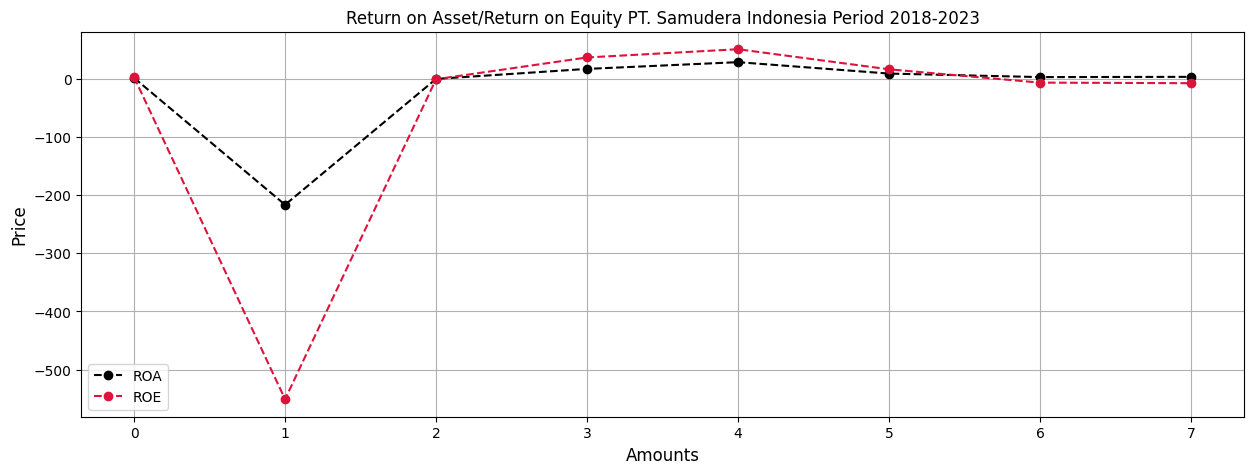

In [7]:
font = {'size': 12}
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

df['ROA'].plot(figsize=(15,5),marker='o',linestyle='dashed',color='black',label='ROA')
df['ROE'].plot(figsize=(15,5),marker='o',linestyle='dashed',color='crimson',label='ROE')

plt.title('Return on Asset/Return on Equity PT. Samudera Indonesia Period 2018-2023',fontdict=font)
plt.xlabel('Amounts',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Corr. Pearson Between Features of Finance Report')

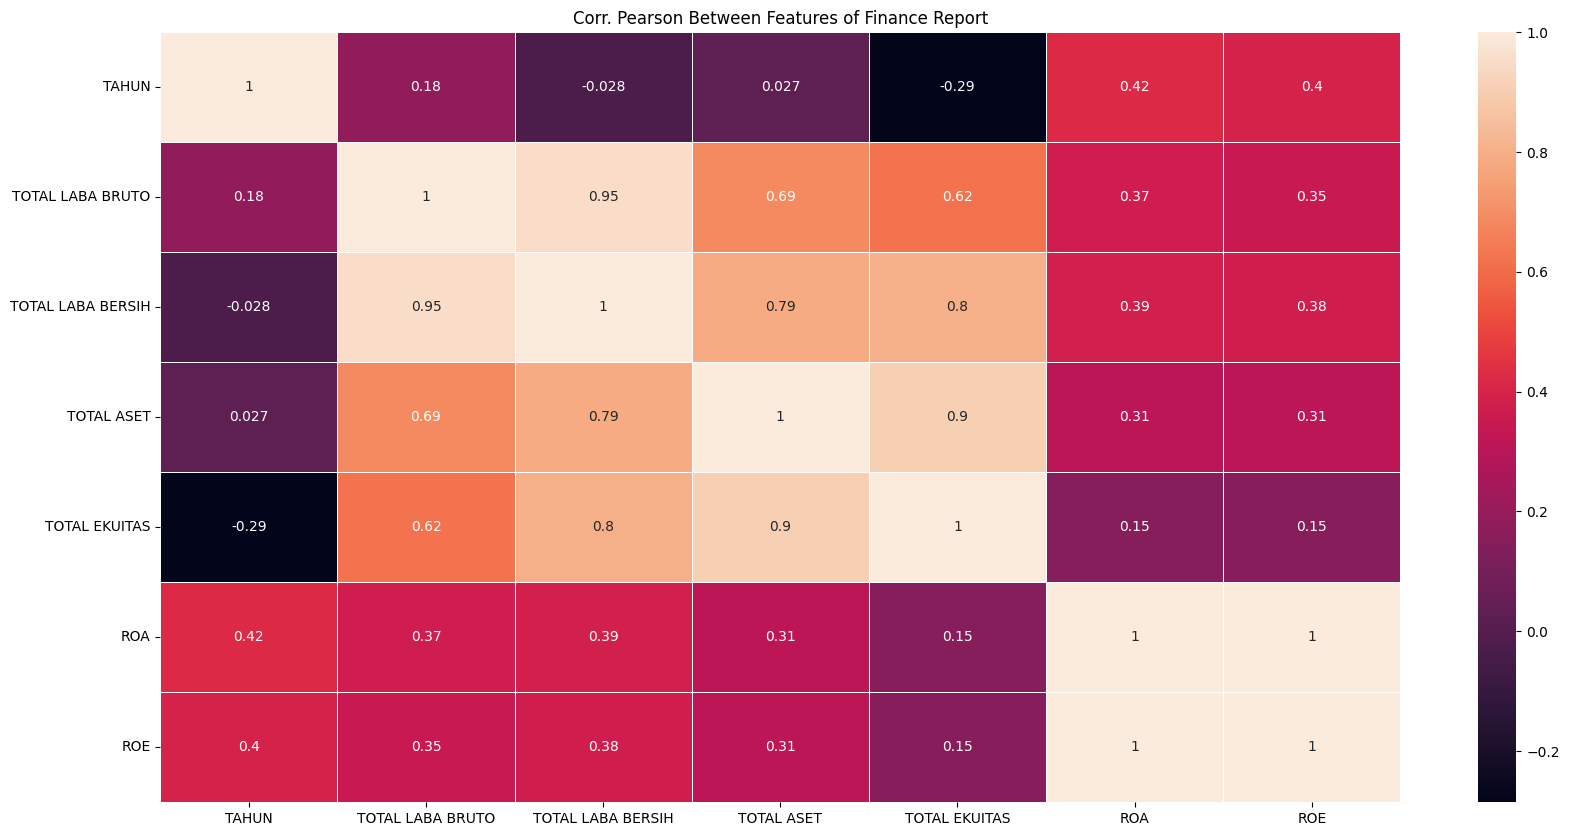

In [8]:
import seaborn as sns

plt.subplots(figsize=(20,10))
sns.heatmap(df.corr('pearson'),annot=True, linewidths=.5)
plt.title('Corr. Pearson Between Features of Finance Report')

#### Feature Selection f/ ROE / ROA

In [56]:
# ROA

X = df.iloc[:,5].values

X

array([   1.24      , -216.71      ,   -0.4       ,   16.77      ,
         28.35      ,    8.75      ,    2.68909274,    3.1136896 ])

In [57]:
# ROE

Y = df.iloc[:,6].values

Y

array([   2.42     , -550.79     ,   -0.96     ,   36.43     ,
         50.58     ,   16.05     ,   -6.8042752,   -7.8      ])

In [58]:
X = X.reshape(-1,1)

X

array([[   1.24      ],
       [-216.71      ],
       [  -0.4       ],
       [  16.77      ],
       [  28.35      ],
       [   8.75      ],
       [   2.68909274],
       [   3.1136896 ]])

In [59]:
Y = Y.reshape(-1,1)

Y

array([[   2.42     ],
       [-550.79     ],
       [  -0.96     ],
       [  36.43     ],
       [  50.58     ],
       [  16.05     ],
       [  -6.8042752],
       [  -7.8      ]])

#### Normalization

In [60]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_X = min_max_scaler.fit_transform(X)
scaled_Y = min_max_scaler.fit_transform(Y)

print('Data X setelah dinormalisasi\n',scaled_X)

Data X setelah dinormalisasi
 [[0.88937403]
 [0.        ]
 [0.88268179]
 [0.95274627]
 [1.        ]
 [0.92001959]
 [0.89528725]
 [0.89701987]]


In [61]:
print('Data Y setelah dinormalisasi\n',scaled_Y)

Data Y setelah dinormalisasi
 [[0.91991619]
 [0.        ]
 [0.91429569]
 [0.97647039]
 [1.        ]
 [0.94258111]
 [0.90457742]
 [0.90292166]]


In [62]:
scaled_Y

array([[0.91991619],
       [0.        ],
       [0.91429569],
       [0.97647039],
       [1.        ],
       [0.94258111],
       [0.90457742],
       [0.90292166]])

In [63]:
scaled_X

array([[0.88937403],
       [0.        ],
       [0.88268179],
       [0.95274627],
       [1.        ],
       [0.92001959],
       [0.89528725],
       [0.89701987]])

#### Split DTr/DTs

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,scaled_Y,random_state=0,test_size=0.30)

In [65]:
X_train.shape

(5, 1)

In [66]:
Y_train.shape

(5, 1)

#### Simulasi Linear Regresi

In [67]:
from sklearn.linear_model import LinearRegression 
regresor = LinearRegression()
regresor.fit(X_train,Y_train)

LinearRegression()

In [68]:
X_train

array([[0.89701987],
       [0.95274627],
       [0.88937403],
       [0.92001959],
       [1.        ]])

In [69]:
scaled_X.shape

(8, 1)

In [70]:
y_estimasi = regresor.predict(X_test)

y_estimasi

array([[0.91747804],
       [0.90681969],
       [0.16048134]])

In [71]:
inversed_scaled_y_estimasi = min_max_scaler.inverse_transform(y_estimasi)

inversed_scaled_y_estimasi

array([[   0.95377142],
       [  -5.45584243],
       [-454.28133548]])

In [72]:
Y_test

array([[0.90457742],
       [0.91429569],
       [0.        ]])

In [73]:
y_estimasi

array([[0.91747804],
       [0.90681969],
       [0.16048134]])

#### Evaluate Model

In [74]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

mse = mean_squared_error(Y_test,y_estimasi)
mae = mean_absolute_error(Y_test,y_estimasi)
mape = mean_absolute_percentage_error(Y_test,y_estimasi)


print('MSE LR : ',mse)
print('MAE LR : ',mae)
print('MAPE LR : ',mape)
print('RMSE LR : ',sqrt(mse))

MSE LR :  0.008658859227439959
MAE LR :  0.060285987864626134
MAPE LR :  240914570393489.84
RMSE LR :  0.09305299150183168


In [75]:
y_estimasi_dua = regresor.predict(scaled_X)

y_estimasi_dua

array([[0.91247821],
       [0.16048134],
       [0.90681969],
       [0.96606166],
       [1.00601634],
       [0.9383901 ],
       [0.91747804],
       [0.91894304]])

In [76]:
y_estimasi_dua = min_max_scaler.inverse_transform(y_estimasi_dua)

y_estimasi_dua

array([[  -2.05297706],
       [-454.28133548],
       [  -5.45584243],
       [  30.17049808],
       [  54.19804748],
       [  13.52965645],
       [   0.95377142],
       [   1.83477505]])

In [77]:
y_estimasi_dua = y_estimasi_dua.reshape(-1)

y_estimasi_dua

array([  -2.05297706, -454.28133548,   -5.45584243,   30.17049808,
         54.19804748,   13.52965645,    0.95377142,    1.83477505])

In [78]:
df_y_estimasi_dua = pd.DataFrame({'Prediction LR':y_estimasi_dua})

df_y_estimasi_dua

,Prediction LR
0,-2.052977
1,-454.281335
2,-5.455842
3,30.170498
4,54.198047
5,13.529656
6,0.953771
7,1.834775


In [79]:
df = df.merge(df_y_estimasi_dua,how='left',left_index=True,right_index=True)

df

,TAHUN,TOTAL LABA BRUTO,TOTAL LABA BERSIH,TOTAL ASET,TOTAL EKUITAS,ROA,ROE,Prediction LR_x,Prediction NN 2 HL,Prediction LR_y
0,2018-12-01,1.532553e+08,1.601574e+07,2.375409e+09,1.214969e+09,1.240000,2.420000,4.010281,10.900002,-2.052977
1,2019-12-01,1.404324e+08,-1.283451e+08,1.713788e+09,8.595327e+08,-216.710000,-550.790000,-242.744686,-15.361454,-454.281335
2,2020-12-01,1.654747e+08,1.557089e+07,2.109741e+09,9.679719e+08,-0.400000,-0.960000,2.502658,10.796674,-5.455842
3,2021-12-01,3.962646e+08,2.751081e+08,2.712382e+09,1.227710e+09,16.770000,36.430000,19.180174,11.908916,30.170498
4,2022-12-01,1.012673e+09,8.557570e+08,4.230422e+09,2.234734e+09,28.350000,50.580000,25.491670,12.312529,54.198047
5,2023-12-01,4.144350e+08,3.195455e+08,4.910944e+09,2.708106e+09,8.750000,16.050000,10.089835,11.311034,13.529656
6,2024-12-01,1.699080e+08,-1.709075e+08,4.331186e+08,-2.376089e+08,2.689093,-6.804275,-0.104135,10.616660,0.953771
7,2025-12-01,2.047961e+08,-2.150376e+08,2.062505e+09,-3.821313e+08,3.113690,-7.800000,-0.548270,10.585825,1.834775


In [80]:
df.drop(columns='Prediction LR_x',inplace=True)
df.rename(columns={'Prediction LR_y':'Prediction LR'},inplace=True)

In [81]:
df

,TAHUN,TOTAL LABA BRUTO,TOTAL LABA BERSIH,TOTAL ASET,TOTAL EKUITAS,ROA,ROE,Prediction NN 2 HL,Prediction LR
0,2018-12-01,1.532553e+08,1.601574e+07,2.375409e+09,1.214969e+09,1.240000,2.420000,10.900002,-2.052977
1,2019-12-01,1.404324e+08,-1.283451e+08,1.713788e+09,8.595327e+08,-216.710000,-550.790000,-15.361454,-454.281335
2,2020-12-01,1.654747e+08,1.557089e+07,2.109741e+09,9.679719e+08,-0.400000,-0.960000,10.796674,-5.455842
3,2021-12-01,3.962646e+08,2.751081e+08,2.712382e+09,1.227710e+09,16.770000,36.430000,11.908916,30.170498
4,2022-12-01,1.012673e+09,8.557570e+08,4.230422e+09,2.234734e+09,28.350000,50.580000,12.312529,54.198047
5,2023-12-01,4.144350e+08,3.195455e+08,4.910944e+09,2.708106e+09,8.750000,16.050000,11.311034,13.529656
6,2024-12-01,1.699080e+08,-1.709075e+08,4.331186e+08,-2.376089e+08,2.689093,-6.804275,10.616660,0.953771
7,2025-12-01,2.047961e+08,-2.150376e+08,2.062505e+09,-3.821313e+08,3.113690,-7.800000,10.585825,1.834775


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TAHUN               8 non-null      datetime64[ns]
 1   TOTAL LABA BRUTO    8 non-null      float64       
 2   TOTAL LABA BERSIH   8 non-null      float64       
 3   TOTAL ASET          8 non-null      float64       
 4   TOTAL EKUITAS       8 non-null      float64       
 5   ROA                 8 non-null      float64       
 6   ROE                 8 non-null      float64       
 7   Prediction NN 2 HL  8 non-null      float32       
 8   Prediction LR       8 non-null      float64       
dtypes: datetime64[ns](1), float32(1), float64(7)
memory usage: 672.0 bytes


In [83]:
df.set_index('TAHUN')

,TOTAL LABA BRUTO,TOTAL LABA BERSIH,TOTAL ASET,TOTAL EKUITAS,ROA,ROE,Prediction NN 2 HL,Prediction LR
TAHUN,,,,,,,,
2018-12-01,1.532553e+08,1.601574e+07,2.375409e+09,1.214969e+09,1.240000,2.420000,10.900002,-2.052977
2019-12-01,1.404324e+08,-1.283451e+08,1.713788e+09,8.595327e+08,-216.710000,-550.790000,-15.361454,-454.281335
2020-12-01,1.654747e+08,1.557089e+07,2.109741e+09,9.679719e+08,-0.400000,-0.960000,10.796674,-5.455842
2021-12-01,3.962646e+08,2.751081e+08,2.712382e+09,1.227710e+09,16.770000,36.430000,11.908916,30.170498
2022-12-01,1.012673e+09,8.557570e+08,4.230422e+09,2.234734e+09,28.350000,50.580000,12.312529,54.198047
2023-12-01,4.144350e+08,3.195455e+08,4.910944e+09,2.708106e+09,8.750000,16.050000,11.311034,13.529656
2024-12-01,1.699080e+08,-1.709075e+08,4.331186e+08,-2.376089e+08,2.689093,-6.804275,10.616660,0.953771
2025-12-01,2.047961e+08,-2.150376e+08,2.062505e+09,-3.821313e+08,3.113690,-7.800000,10.585825,1.834775


#### Visualization

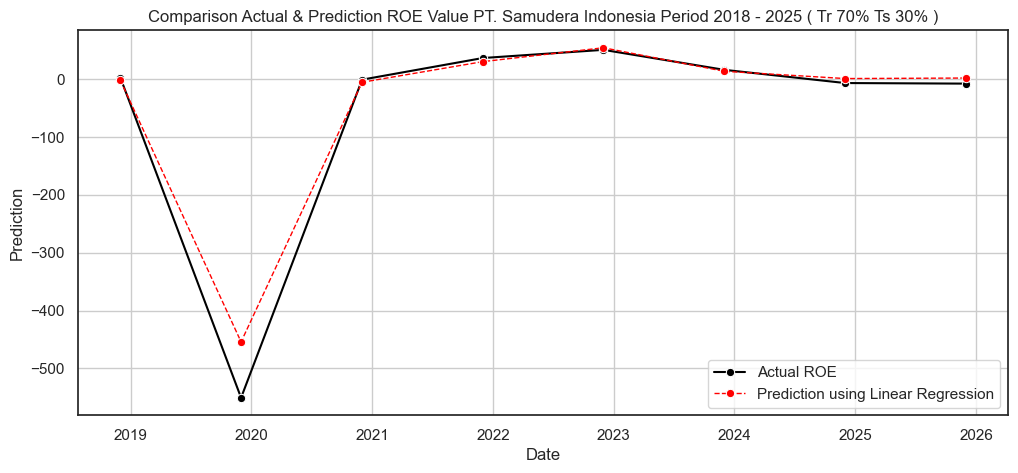

In [85]:
# date_form = mdates.DateFormatter("%Y-%m")

# half_year_locator = mdates.MonthLocator(interval=6)
# year_month_formatter = mdates.DateFormatter("%Y-%m")
# month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(12,5))
# ax.xaxis.set_major_locator(half_year_locator)
# ax.xaxis.set_major_formatter(year_month_formatter)
# ax.xaxis.set_major_formatter(month_year_formatter)
# ax.xaxis.set_major_formatter(date_form)

# fig.autofmt_xdate()

# plt.figure(figsize=(25,7))
sns.set_theme(style='white',font_scale=1.0)


sns.lineplot(x=df['TAHUN'],y=df['ROE'],data=df,linestyle='solid',color='black',linewidth=1.5,label='Actual ROE',marker='o')

sns.lineplot(x=df['TAHUN'],y=df['Prediction LR'],data=df,linestyle='dashed',color='red',linewidth=1.0,label='Prediction using Linear Regression',marker='o')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Comparison Actual & Prediction ROE Value PT. Samudera Indonesia Period 2018 - 2025 ( Tr 70% Ts 30% )')
plt.grid(True)
plt.show()


In [86]:
df['ROA']

0      1.240000
1   -216.710000
2     -0.400000
3     16.770000
4     28.350000
5      8.750000
6      2.689093
7      3.113690
Name: ROA, dtype: float64

In [87]:
df['ROE']

0      2.420000
1   -550.790000
2     -0.960000
3     36.430000
4     50.580000
5     16.050000
6     -6.804275
7     -7.800000
Name: ROE, dtype: float64

#### Pemodelan NN

In [88]:
import tensorflow as tf 

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=18,input_dim=1, kernel_initializer='normal',activation='relu'),
        tf.keras.layers.Dense(units=36,kernel_initializer='normal',activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [89]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse']
)

In [90]:
model.fit(
    X_train,Y_train,epochs=300
)

Epoch 1/300
1/1 [==============================] - 1s 684ms/step - loss: 0.2030 - mse: 0.2030
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 0.2017 - mse: 0.2017
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 0.2007 - mse: 0.2007
Epoch 4/300
1/1 [==============================] - 0s 0s/step - loss: 0.1999 - mse: 0.1999
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1992 - mse: 0.1992
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 0.1986 - mse: 0.1986
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 0.1979 - mse: 0.1979
Epoch 8/300
1/1 [==============================] - 0s 17ms/step - loss: 0.1974 - mse: 0.1974
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 0.1968 - mse: 0.1968
Epoch 10/300
1/1 [==============================] - 0s 576us/step - loss: 0.1962 - mse: 0.1962
Epoch 11/300
1/1 [==============================] - 0s 15ms/step - loss: 0

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 18)                36        
                                                                 
 dense_4 (Dense)             (None, 36)                684       
                                                                 
 dense_5 (Dense)             (None, 1)                 37        
                                                                 
Total params: 757 (2.96 KB)
Trainable params: 757 (2.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
pred_nn = model.predict(X_test)

pred_nn

1/1 [==============================] - 0s 58ms/step


array([[0.928478  ],
       [0.92752326],
       [0.82471114]], dtype=float32)

#### Evaluasi Model NN

In [93]:
mae_nn = mean_absolute_error(y_pred=pred_nn,y_true=Y_test)
print('MAE NN : ',mae_nn)

mse_nn = mean_squared_error(y_pred=pred_nn,y_true=Y_test)
print('MSE NN : ',mse_nn)

rmse_nn = sqrt(mse_nn)
print('RMSE NN : ',rmse_nn)

MAE NN :  0.2872797624915037
MSE NN :  0.22696489238081655
RMSE NN :  0.4764083252639657


In [94]:
pred_nn_dua = model.predict(scaled_X)

pred_nn_dua

1/1 [==============================] - 0s 17ms/step


array([[0.92803156],
       [0.82471114],
       [0.92752326],
       [0.9326848 ],
       [0.9359711 ],
       [0.9303177 ],
       [0.928478  ],
       [0.92860836]], dtype=float32)

In [95]:
inversed_scaled_pred_nn_dua = min_max_scaler.inverse_transform(pred_nn_dua)

inversed_scaled_pred_nn_dua

array([[  7.300341 ],
       [-54.83346  ],
       [  6.99466  ],
       [ 10.098646 ],
       [ 12.074929 ],
       [  8.675155 ],
       [  7.568816 ],
       [  7.6472077]], dtype=float32)

In [96]:
inversed_scaled_pred_nn_dua = inversed_scaled_pred_nn_dua.reshape(-1)

inversed_scaled_pred_nn_dua

array([  7.300341 , -54.83346  ,   6.99466  ,  10.098646 ,  12.074929 ,
         8.675155 ,   7.568816 ,   7.6472077], dtype=float32)

In [97]:
df_pred_nn_dua = pd.DataFrame({'Prediction NN 2 HL':inversed_scaled_pred_nn_dua})

df_pred_nn_dua

,Prediction NN 2 HL
0,7.300341
1,-54.833462
2,6.994660
3,10.098646
4,12.074929
5,8.675155
6,7.568816
7,7.647208


In [98]:
df = df.merge(df_pred_nn_dua,how='left',left_index=True,right_index=True)

df

,TAHUN,TOTAL LABA BRUTO,TOTAL LABA BERSIH,TOTAL ASET,TOTAL EKUITAS,ROA,ROE,Prediction NN 2 HL_x,Prediction LR,Prediction NN 2 HL_y
0,2018-12-01,1.532553e+08,1.601574e+07,2.375409e+09,1.214969e+09,1.240000,2.420000,10.900002,-2.052977,7.300341
1,2019-12-01,1.404324e+08,-1.283451e+08,1.713788e+09,8.595327e+08,-216.710000,-550.790000,-15.361454,-454.281335,-54.833462
2,2020-12-01,1.654747e+08,1.557089e+07,2.109741e+09,9.679719e+08,-0.400000,-0.960000,10.796674,-5.455842,6.994660
3,2021-12-01,3.962646e+08,2.751081e+08,2.712382e+09,1.227710e+09,16.770000,36.430000,11.908916,30.170498,10.098646
4,2022-12-01,1.012673e+09,8.557570e+08,4.230422e+09,2.234734e+09,28.350000,50.580000,12.312529,54.198047,12.074929
5,2023-12-01,4.144350e+08,3.195455e+08,4.910944e+09,2.708106e+09,8.750000,16.050000,11.311034,13.529656,8.675155
6,2024-12-01,1.699080e+08,-1.709075e+08,4.331186e+08,-2.376089e+08,2.689093,-6.804275,10.616660,0.953771,7.568816
7,2025-12-01,2.047961e+08,-2.150376e+08,2.062505e+09,-3.821313e+08,3.113690,-7.800000,10.585825,1.834775,7.647208


In [99]:
df.drop(columns='Prediction NN 2 HL_x',inplace=True)
df.rename(columns={'Prediction NN 2 HL_y':'Prediction NN 2 HL'},inplace=True)

In [100]:
df

,TAHUN,TOTAL LABA BRUTO,TOTAL LABA BERSIH,TOTAL ASET,TOTAL EKUITAS,ROA,ROE,Prediction LR,Prediction NN 2 HL
0,2018-12-01,1.532553e+08,1.601574e+07,2.375409e+09,1.214969e+09,1.240000,2.420000,-2.052977,7.300341
1,2019-12-01,1.404324e+08,-1.283451e+08,1.713788e+09,8.595327e+08,-216.710000,-550.790000,-454.281335,-54.833462
2,2020-12-01,1.654747e+08,1.557089e+07,2.109741e+09,9.679719e+08,-0.400000,-0.960000,-5.455842,6.994660
3,2021-12-01,3.962646e+08,2.751081e+08,2.712382e+09,1.227710e+09,16.770000,36.430000,30.170498,10.098646
4,2022-12-01,1.012673e+09,8.557570e+08,4.230422e+09,2.234734e+09,28.350000,50.580000,54.198047,12.074929
5,2023-12-01,4.144350e+08,3.195455e+08,4.910944e+09,2.708106e+09,8.750000,16.050000,13.529656,8.675155
6,2024-12-01,1.699080e+08,-1.709075e+08,4.331186e+08,-2.376089e+08,2.689093,-6.804275,0.953771,7.568816
7,2025-12-01,2.047961e+08,-2.150376e+08,2.062505e+09,-3.821313e+08,3.113690,-7.800000,1.834775,7.647208


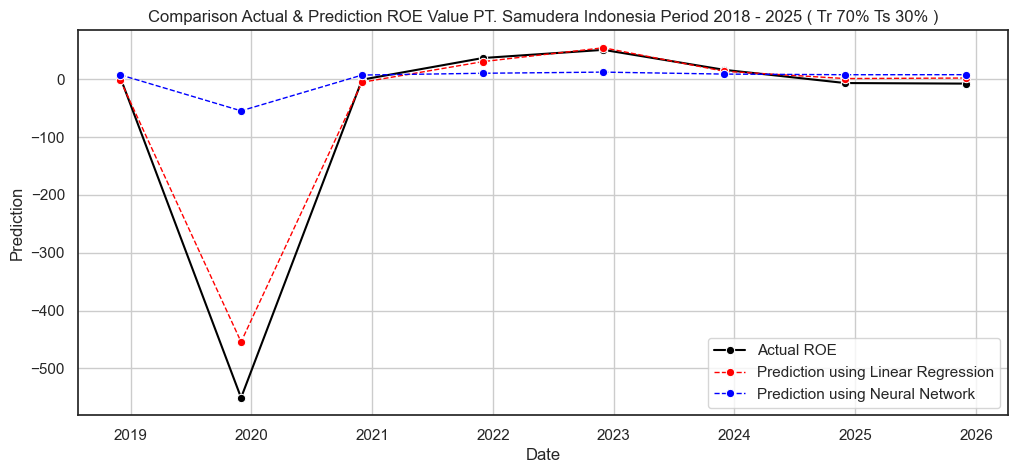

In [103]:
# date_form = mdates.DateFormatter("%Y-%m")

# half_year_locator = mdates.MonthLocator(interval=6)
# year_month_formatter = mdates.DateFormatter("%Y-%m")
# month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(12,5))
# ax.xaxis.set_major_locator(half_year_locator)
# ax.xaxis.set_major_formatter(year_month_formatter)
# ax.xaxis.set_major_formatter(month_year_formatter)
# ax.xaxis.set_major_formatter(date_form)

# fig.autofmt_xdate()

# plt.figure(figsize=(25,7))
sns.set_theme(style='white',font_scale=1.0)


sns.lineplot(x=df['TAHUN'],y=df['ROE'],data=df,linestyle='solid',color='black',linewidth=1.5,label='Actual ROE',marker='o')

sns.lineplot(x=df['TAHUN'],y=df['Prediction LR'],data=df,linestyle='dashed',color='red',linewidth=1.0,label='Prediction using Linear Regression',marker='o')

sns.lineplot(x=df['TAHUN'],y=df['Prediction NN 2 HL'],data=df,linestyle='dashed',color='blue',linewidth=1.0,label='Prediction using Neural Network',marker='o')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Comparison Actual & Prediction ROE Value PT. Samudera Indonesia Period 2018 - 2025 ( Tr 70% Ts 30% )')
plt.grid(True)
plt.show()


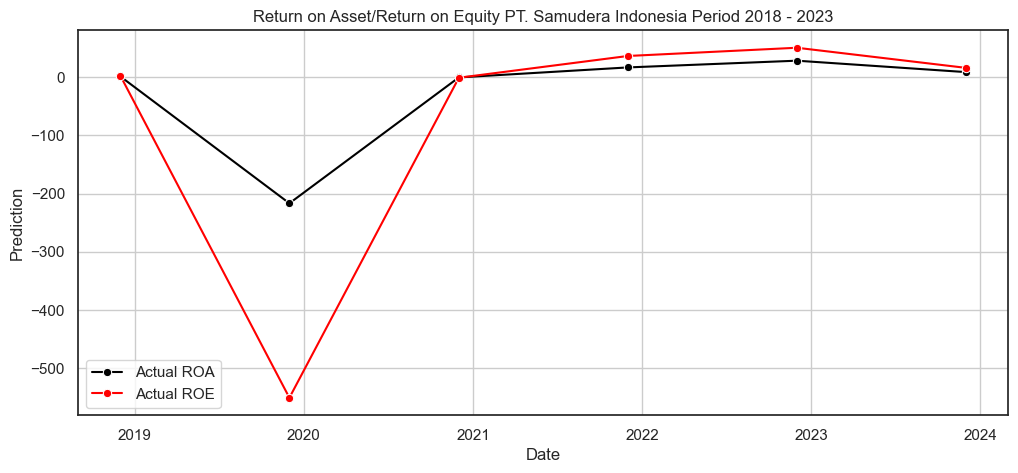

In [55]:
# date_form = mdates.DateFormatter("%Y-%m")

# half_year_locator = mdates.MonthLocator(interval=6)
# year_month_formatter = mdates.DateFormatter("%Y-%m")
# month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(12,5))
# ax.xaxis.set_major_locator(half_year_locator)
# ax.xaxis.set_major_formatter(year_month_formatter)
# ax.xaxis.set_major_formatter(month_year_formatter)
# ax.xaxis.set_major_formatter(date_form)

# fig.autofmt_xdate()

# plt.figure(figsize=(25,7))
sns.set_theme(style='white',font_scale=1.0)


sns.lineplot(x=df['TAHUN'],y=df['ROA'],data=df,linestyle='solid',color='black',linewidth=1.5,label='Actual ROA',marker='o')

sns.lineplot(x=df['TAHUN'],y=df['ROE'],data=df,linestyle='solid',color='red',linewidth=1.5,label='Actual ROE',marker='o')

# sns.lineplot(x=df['TAHUN'],y=df['Prediction NN 2 HL'],data=df,linestyle='dashed',color='blue',linewidth=1.0,label='Prediction using Neural Network',marker='o')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Return on Asset/Return on Equity PT. Samudera Indonesia Period 2018 - 2023')
plt.grid(True)
plt.show()
